In [1]:
from cf_libs import *
from cf_helper import *
from dataGen_10 import featuresBND,features6ND,features12ND,featuresBMMD,features6MMD,features12MMD,featuresBSD,features6SD,features12SD

Features extracted
Features extracted
Features extracted
Features extracted
Features extracted
Features extracted
Features extracted
Features extracted
Features extracted


<b>Train Data: Baseline Datasets<b>

In [2]:
#train = featuresBND
#train = pd.concat([featuresBND,features12MMD],axis=0)
#train = pd.concat([featuresBND,featuresBMMD,featuresBSD],axis=0)
train = pd.concat([featuresBND,features6ND,features12ND],axis=0)
train.head()
features = train.columns.values.tolist()
features = train.columns.values.tolist()
train.drop(['index'], axis=1, inplace=True)
train.describe()

,fz_alpha_peakPower,cz_alpha_peakPower,pz_alpha_peakPower,global_alpha_peakPower,fz_alpha_diff,cz_alpha_diff,pz_alpha_diff,global_alpha_diff,fz_alpha_ratio,cz_alpha_ratio,pz_alpha_ratio,global_alpha_ratio,labels
count,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000
mean,4.125158e+00,4.564077e+00,4.491041e+00,1.842312e+00,4.785444e-19,7.656711e-18,-2.153450e-17,3.828355e-18,1.091297,1.062319,1.265940,1.123239,0.500000
std,1.862938e+00,2.201740e+00,2.206179e+00,7.916186e-01,8.749943e-01,1.156842e+00,8.696595e-01,4.784825e-01,0.666640,0.482445,2.060387,0.845946,0.504367
min,2.730312e-07,3.609257e-07,6.506522e-07,2.630708e-07,-2.923621e+00,-3.948646e+00,-3.877804e+00,-1.790970e+00,0.176763,0.237801,0.060221,0.144374,0.000000
25%,2.571013e+00,2.911724e+00,3.265929e+00,1.181915e+00,-3.845772e-01,-4.668112e-01,-2.710748e-01,-1.726322e-01,0.883275,0.892387,0.928520,0.897912,0.000000
50%,4.390438e+00,4.563631e+00,4.166441e+00,1.715185e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000006,1.000032,1.000030,1.000004,0.500000
75%,5.274507e+00,5.755816e+00,5.455959e+00,2.441555e+00,3.845772e-01,4.668112e-01,2.710748e-01,1.726322e-01,1.132151,1.120676,1.076984,1.113695,1.000000
max,7.808514e+00,1.130984e+01,1.239411e+01,3.794362e+00,2.923621e+00,3.948646e+00,3.877804e+00,1.790970e+00,5.657301,4.205202,16.605492,6.926451,1.000000


<B>Train Data: Replace NaNs<B>

In [3]:
train.fillna(train.mean(), inplace=True)

<b>Train Data: Check Classes <b>

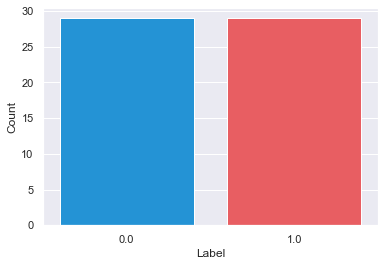

1.0    29
0.0    29
Name: labels, dtype: int64

In [4]:
sns.set(style="darkgrid")
ax = sns.countplot(x="labels", data=train, palette=sns.xkcd_palette(["azure", "light red"]))
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
train['labels'].value_counts()

<b>Train Data: Check for Outliers<b>

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


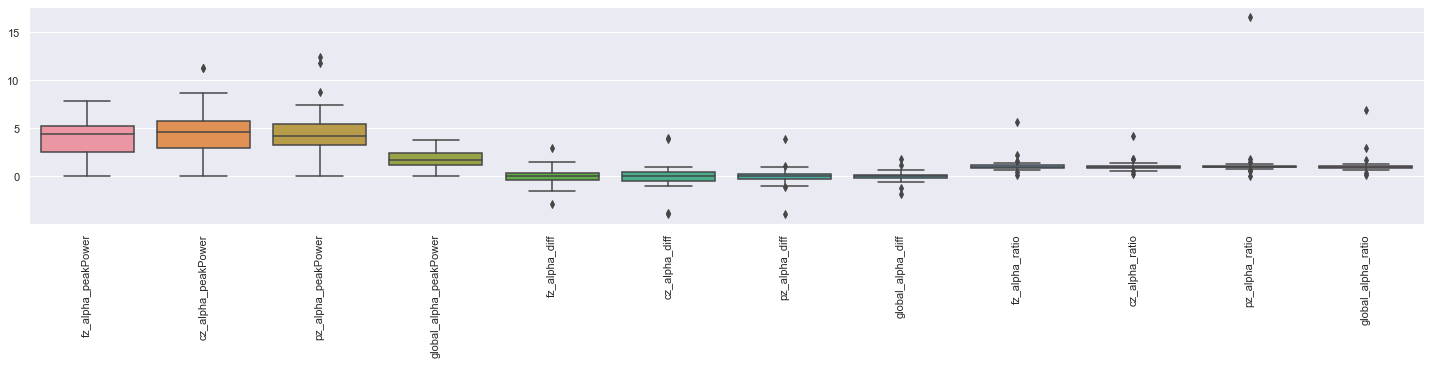

In [5]:
# boxplots to visualize the distribution of features
fig, ax = plt.subplots(1, 1, figsize=(25,4))
sns.boxplot(data=train.drop(['labels'], axis=1), ax=ax)
plt.xticks(rotation=90)
plt.show()

<B>Test Data: All other groups<B>

In [6]:
test = features6SD
test = test.dropna()
features = test.columns.values.tolist()
test.drop(['index'], axis=1, inplace=True)
xtest,ytest = test.drop(['labels'], axis=1), test['labels'].ravel()
test.describe()

/var/folders/ry/jhpq361x33g2tv7b7l6j0md80000gn/T/ipykernel_1329/1126700774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['index'], axis=1, inplace=True)


,fz_alpha_peakPower,cz_alpha_peakPower,pz_alpha_peakPower,global_alpha_peakPower,fz_alpha_diff,cz_alpha_diff,pz_alpha_diff,global_alpha_diff,fz_alpha_ratio,cz_alpha_ratio,pz_alpha_ratio,global_alpha_ratio,labels
count,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,5.994155,6.300620,6.490275,2.624539,0.000000,-1.233581e-17,0.000000,0.000000,1.013092,1.015487,1.013440,1.022811,0.500000
std,2.943088,2.612186,2.477522,1.146656,0.855171,1.299628e+00,0.953504,0.583182,0.169425,0.183669,0.171155,0.223925,0.514496
min,1.363096,1.715126,2.598225,0.724232,-1.804553,-3.241002e+00,-2.043315,-1.180691,0.701432,0.735028,0.738176,0.693286,0.000000
25%,4.130358,4.641601,4.436515,1.724930,-0.510239,-3.991142e-01,-0.507630,-0.329319,0.912990,0.913657,0.937314,0.835092,0.000000
50%,5.454963,6.254110,6.687463,2.470207,0.000000,0.000000e+00,0.000000,0.000000,1.000787,1.000281,1.000002,1.000010,0.500000
75%,8.323937,7.900376,8.767979,3.526932,0.510239,3.991142e-01,0.507630,0.329319,1.095409,1.095432,1.066889,1.198970,1.000000
max,11.554314,12.231511,10.166633,4.830091,1.804553,3.241002e+00,2.043315,1.180691,1.425655,1.360492,1.354691,1.442406,1.000000


<b>Normalization: Train & Test Data <b>

In [7]:
xtrain = train.drop(['labels'], axis=1)
ytrain = train['labels'].ravel()

In [8]:
scaler = MinMaxScaler()
xtrainNORM = scaler.fit_transform(xtrain)
xtestNORM = scaler.transform(xtest)
xtrainNORM = pd.DataFrame(xtrainNORM)
xtrainNORM.columns = features[1:-1]
xtrainNORM.isnull().sum()

fz_alpha_peakPower        0
cz_alpha_peakPower        0
pz_alpha_peakPower        0
global_alpha_peakPower    0
fz_alpha_diff             0
cz_alpha_diff             0
pz_alpha_diff             0
global_alpha_diff         0
fz_alpha_ratio            0
cz_alpha_ratio            0
pz_alpha_ratio            0
global_alpha_ratio        0
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


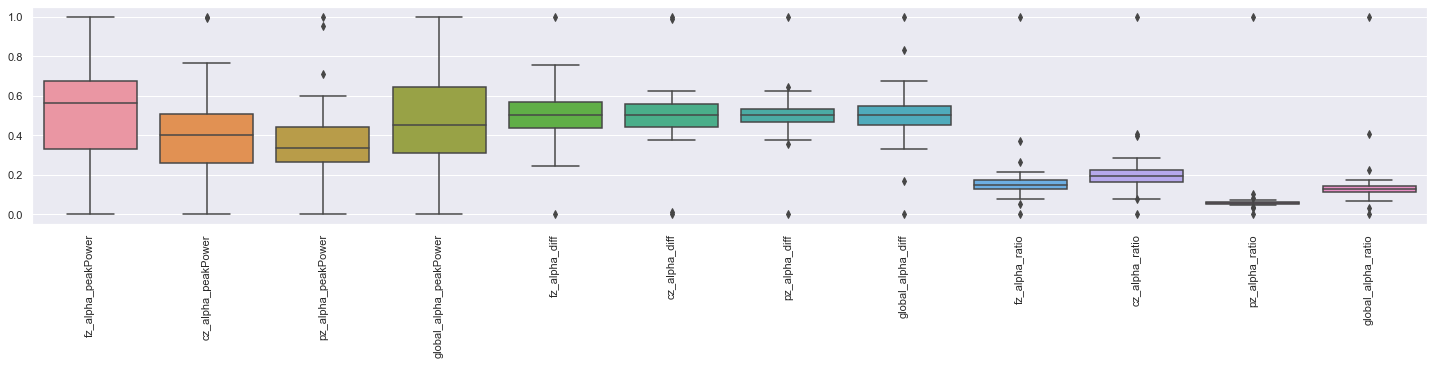

In [9]:
# boxplots to visualize the distribution of features
fig, ax = plt.subplots(1, 1, figsize=(25,4))
sns.boxplot(data=xtrainNORM, ax=ax)
plt.xticks(rotation=90)
plt.show()

<b>PCA<b>

Number of features in train set after PCA:  8
Number of features in test set after PCA:  8
Features after PCA:, fz_alpha_peakPower, cz_alpha_peakPower, pz_alpha_peakPower, global_alpha_peakPower, fz_alpha_diff, cz_alpha_diff, pz_alpha_diff


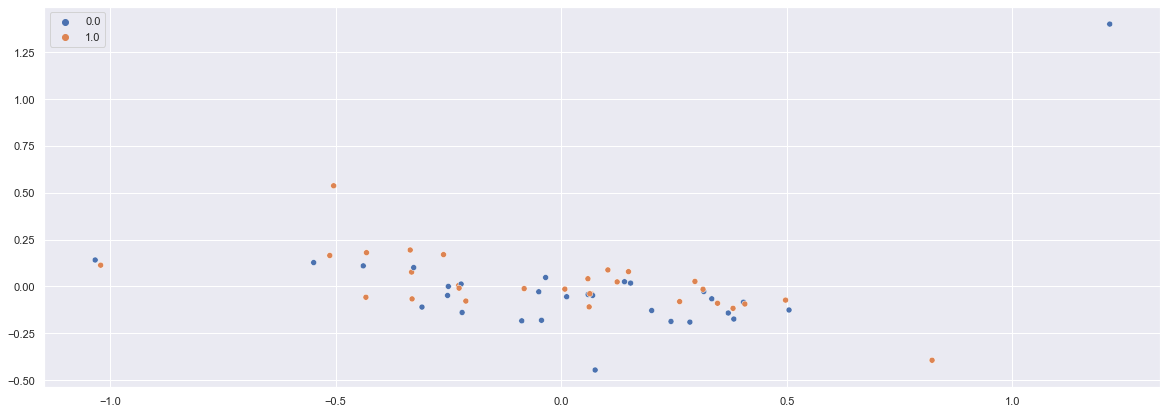

In [10]:
# convert to numpy array
xtrainNORM = xtrainNORM.values
pca = PCA(n_components=0.99,random_state=0)
pca.fit(xtrainNORM)
xtrainPCA = pca.transform(xtrainNORM)
xtestPCA = pca.transform(xtestNORM)
print("Number of features in train set after PCA: ", xtrainPCA.shape[1])
print("Number of features in test set after PCA: ", xtestPCA.shape[1])
indices = np.argsort(pca.explained_variance_ratio_)[::-1]
names = [features[i] for i in indices]
names.pop(0)
print("Features after PCA:",*names, sep = ", ")

# scatter plot of all principal components seperating the classes
fig, ax = plt.subplots(1, 1, figsize=(20,7))
sns.scatterplot(x=xtrainPCA[:,0], y=xtrainPCA[:,1], hue=ytrain, ax=ax)
plt.show()

In [11]:
random_state = 42

clf_keys = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "k-Nearest Neighbors",
            "Stochastic Gradient Descent", "Decision Tree", "AdaBoost", "Random Forest","Extra Gradient Boosting",'Gradient Boosting']
clf_values = [LogisticRegression(random_state=random_state,max_iter=1000), SVC(random_state=random_state),
              GaussianNB(), KNeighborsClassifier(), SGDClassifier(random_state=random_state),
              DecisionTreeClassifier(random_state=random_state), AdaBoostClassifier(random_state=random_state),
              RandomForestClassifier(random_state=random_state),XGBClassifier(random_state=random_state),GradientBoostingClassifier(random_state=random_state)]
clfs = dict(zip(clf_keys, clf_values))

<b>CrossValidation<b>

In [12]:
for clf in clfs:
    loo = LeaveOneOut()
    loo.get_n_splits(xtrainNORM)
    scoresNORM = cross_val_score(clfs[clf], xtrainNORM, ytrain, cv=loo, scoring='accuracy').mean()

for clf in clfs:
    loo = LeaveOneOut()
    loo.get_n_splits(xtrainPCA)
    scoresPCA = cross_val_score(clfs[clf], xtrainPCA, ytrain, cv=loo, scoring='accuracy').mean()
    
scores_loocv = pd.DataFrame ({"Normalized Features": scoresNORM, "PCA Features": scoresPCA}, index=clf_keys)
display(scores_loocv)

KeyboardInterrupt: 

<b>Train & Test<b>

In [13]:
ypredNORM,ypredPCA = [],[]
for clf_name, clf in clfs.items():
    clf.fit(xtrainNORM, ytrain)
    ypredNORM.append(clf.predict(xtestNORM))
    
for clf_name, clf in clfs.items():
    clf.fit(xtrainPCA, ytrain)
    ypredPCA.append(clf.predict(xtestPCA))

<b>Accuracy, Specificity, Sensitivity<b>

In [14]:
# accuracy score
accNORM,accPCA = [],[]
for i in range(len(clf_keys)):
    accNORM.append(accuracy_score(ytest, ypredNORM[i]))
for i in range(len(clf_keys)):
    accPCA.append(accuracy_score(ytest, ypredPCA[i]))

# specificity & sensitivity
specNORM,specPCA,sensNORM,sensPCA = [],[],[],[]
for i in range(len(clf_keys)):
    tn, fp, fn, tp = confusion_matrix(ytest, ypredNORM[i]).ravel()
    specNORM.append(tn/(tn+fp))
    sensNORM.append(tp/(tp+fn))
for i in range(len(clf_keys)):
    tn, fp, fn, tp = confusion_matrix(ytest, ypredPCA[i]).ravel()
    specPCA.append(tn/(tn+fp))
    sensPCA.append(tp/(tp+fn))
    
perfNorm = pd.DataFrame ({"Norm-Accuracy":accNORM, "Norm-Specificity": specNORM, "Norm-Sensitivity": sensNORM},index=clf_keys)
perfPCA = pd.DataFrame ({"PCA-Accuracy":accPCA, "PCA-Specificity": specPCA, "PCA-Sensitivity": sensPCA},index=clf_keys)
display(perfNorm)
display(perfPCA)   

,Norm-Accuracy,Norm-Specificity,Norm-Sensitivity
Logistic Regression,0.777778,0.777778,0.777778
Support Vector Machine,0.666667,0.777778,0.555556
Naive Bayes,0.500000,0.000000,1.000000
k-Nearest Neighbors,0.444444,0.444444,0.444444
Stochastic Gradient Descent,0.555556,0.777778,0.333333
Decision Tree,0.555556,0.555556,0.555556
AdaBoost,0.722222,0.666667,0.777778
Random Forest,0.722222,0.666667,0.777778
Extra Gradient Boosting,0.555556,0.555556,0.555556
Gradient Boosting,0.555556,0.555556,0.555556


,PCA-Accuracy,PCA-Specificity,PCA-Sensitivity
Logistic Regression,0.777778,0.777778,0.777778
Support Vector Machine,0.611111,0.555556,0.666667
Naive Bayes,0.666667,0.555556,0.777778
k-Nearest Neighbors,0.444444,0.444444,0.444444
Stochastic Gradient Descent,0.444444,0.333333,0.555556
Decision Tree,0.666667,0.666667,0.666667
AdaBoost,0.666667,0.555556,0.777778
Random Forest,0.666667,0.555556,0.777778
Extra Gradient Boosting,0.722222,0.666667,0.777778
Gradient Boosting,0.666667,0.555556,0.777778


<b>Pipeline<b>

In [15]:
clf_1 = pipeline(clf_name="Random Forest",clf=RandomForestClassifier(random_state=0),
                   traindata=pd.concat([featuresBND,features6ND,features12ND],axis=0),
                   testdatasets=[featuresBND,features6ND,features12ND,featuresBMMD,features6MMD,features12MMD,featuresBSD,features6SD,features12SD],
                   testdatasets_names=["BND","6ND","12ND","BMMD","6MMD","12MMD","BSD","6SD","12SD"])


 BND


,Norm-Accuracy,Norm-Specificity,Norm-Sensitivity
Random Forest,1.0,1.0,1.0


,PCA-Accuracy,PCA-Specificity,PCA-Sensitivity
Random Forest,1.0,1.0,1.0



 6ND


,Norm-Accuracy,Norm-Specificity,Norm-Sensitivity
Random Forest,1.0,1.0,1.0


,PCA-Accuracy,PCA-Specificity,PCA-Sensitivity
Random Forest,1.0,1.0,1.0



 12ND


,Norm-Accuracy,Norm-Specificity,Norm-Sensitivity
Random Forest,1.0,1.0,1.0


,PCA-Accuracy,PCA-Specificity,PCA-Sensitivity
Random Forest,1.0,1.0,1.0



 BMMD


,Norm-Accuracy,Norm-Specificity,Norm-Sensitivity
Random Forest,0.625,0.6875,0.5625


,PCA-Accuracy,PCA-Specificity,PCA-Sensitivity
Random Forest,0.59375,0.6875,0.5



 6MMD


,Norm-Accuracy,Norm-Specificity,Norm-Sensitivity
Random Forest,0.5,0.538462,0.461538


,PCA-Accuracy,PCA-Specificity,PCA-Sensitivity
Random Forest,0.615385,0.615385,0.615385



 12MMD


,Norm-Accuracy,Norm-Specificity,Norm-Sensitivity
Random Forest,0.5,0.5,0.5


,PCA-Accuracy,PCA-Specificity,PCA-Sensitivity
Random Forest,0.6875,0.75,0.625



 BSD


,Norm-Accuracy,Norm-Specificity,Norm-Sensitivity
Random Forest,0.583333,0.583333,0.583333


,PCA-Accuracy,PCA-Specificity,PCA-Sensitivity
Random Forest,0.5,0.5,0.5



 6SD


,Norm-Accuracy,Norm-Specificity,Norm-Sensitivity
Random Forest,0.666667,0.666667,0.666667


,PCA-Accuracy,PCA-Specificity,PCA-Sensitivity
Random Forest,0.722222,0.666667,0.777778



 12SD


,Norm-Accuracy,Norm-Specificity,Norm-Sensitivity
Random Forest,0.857143,0.857143,0.857143


,PCA-Accuracy,PCA-Specificity,PCA-Sensitivity
Random Forest,0.714286,0.714286,0.714286
